# MITRE + OWASP Threat Modelling

In this demo, we will use a graph built from MITRE and OWASP data sources to create a list of security requirements ([OWASP ASVS](https://owasp.org/www-project-application-security-verification-standard/)) based on the consequences ([MITRE CAPEC](https://capec.mitre.org/)) we want to avoid.

To run this demo, you need to build the graph, in this repo there is a 'source' folder, in here are three data routines to be run in order:
- 01 acquire_rawdata.py
- 02 process_rawdata.py
- 03 build_graph.py

These download, transform and build into a grpah.

In [1]:
# import libraries we will use
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

import mitretools as mt

In [2]:
# simple routine to help with display
def log(items):
    for key in items:
        print(key)

In [3]:
# load the precompiled graph (you will need to build this)
graph = nx.read_graphml(r'data/processed/mitre-data.graphml')
print('nodes:', len(graph.nodes()))
print('edges:', len(graph.edges()))

nodes: 3063
edges: 9896


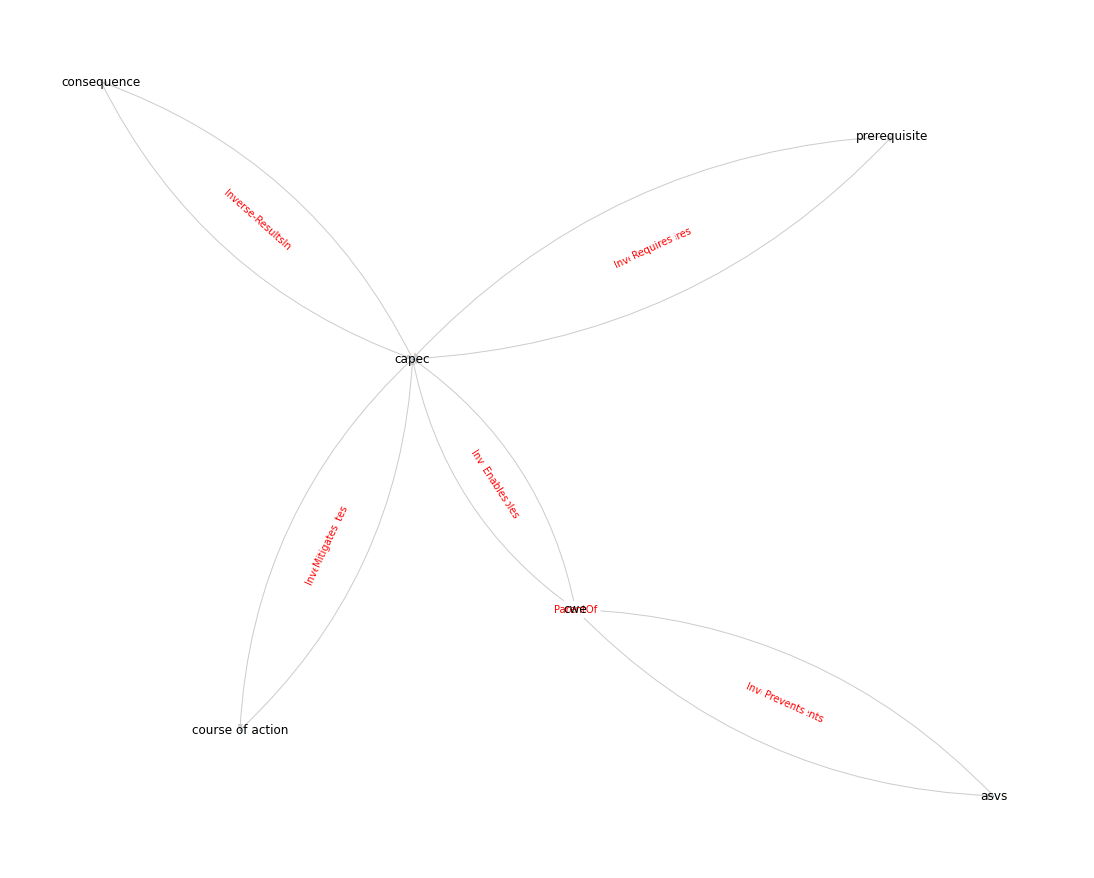

In [4]:
# simplify and draw the node and edge types    
s = mt.simplify_graph(graph)
mt.show_graph(s)

CAPEC references are mapped to Consequences (exploit of a CAPEC ResultsIn a Consequence), Courses of Action (Courses of Action Mitigates exploitation of a CAPEC), CWEs (CWEs are weaknesses which Enables exploitation of a CAPEC). CWEs in turn map to ASVS (ASVS describe how to test if there is a Weakness).

This allows us to build a mapping from Consequences to ASVS.

In [5]:
# list all of the potential consequences
log(mt.list_nodes(graph, ['consequence'], ['group', 'label']))

Confidentiality, Gain Privileges
Access_Control, Gain Privileges
Authorization, Gain Privileges
Availability, Unreliable Execution
Availability, Execute Unauthorized Commands
Confidentiality, Execute Unauthorized Commands
Confidentiality, Read Data
Integrity, Execute Unauthorized Commands
Integrity, Modify Data
Confidentiality, Modify Data
Availability, Resource Consumption
Confidentiality, Bypass Protection Mechanism
Access_Control, Bypass Protection Mechanism
Authorization, Bypass Protection Mechanism
Confidentiality, Other
Authorization, Execute Unauthorized Commands
Accountability, Gain Privileges
Authentication, Gain Privileges
Non-Repudiation, Gain Privileges
Integrity, Gain Privileges
Integrity, Other
Availability, Other
Access_Control, Execute Unauthorized Commands
Integrity, Alter Execution Logic
Integrity, Hide Activities
Integrity, Read Data
Availability, Alter Execution Logic
Confidentiality, Alter Execution Logic
Confidentiality, Hide Activities
Access_Control, Hide Activi

In [6]:
# For this example, we're interested in preventing Authorization issues by Bypassing Protection Mechanisms
# To filter the tree, we set the starting node (label = 'Bypass Protection Mechanism' & group = 'Authorization'),
#    we limit the relationships we will follow, and we set any additional filters... in this case we only want
#    to pass through 'capec' nodes where the likelihood_of_attack is 'High'

requirements = mt.filter_graph(graph, 
                 { 
                     'label': ['Bypass Protection Mechanism'], 
                     'group': ['Authorization'] 
                 }, 
                 { 'relationship': ['Inverse-ResultsIn',
                                    #'ResultsIn', 
                                    'Inverse-Enables', 
                                    #'Enables', 
                                    #'Inverse-Requires',
                                    #'Requires',
                                    'Inverse-Prevents',
                                    #'Prevents',
                                    'Inverse-Mitigates',
                                    #'Mitigates',
                                    'ChildOf',
                                    'ParentOf',
                                     ''
                                   ] },
                { 'capec' : { 'likelihood_of_attack': 'High' } })

In [7]:
# For those consequences, show the CAPEC references they map to
log(mt.list_nodes(requirements, ['capec'], ['label', 'description']))

CAPEC-318, IP 'ID' Echoed Byte-Order Probe
CAPEC-323, TCP (ISN) Counter Rate Probe
CAPEC-307, TCP RPC Scan
CAPEC-326, TCP Initial Window Size Probe
CAPEC-304, TCP Null Scan
CAPEC-573, Process Footprinting
CAPEC-308, UDP Scan
CAPEC-297, TCP ACK Ping
CAPEC-196, Session Credential Falsification through Forging
CAPEC-132, Symlink Attack
CAPEC-328, TCP 'RST' Flag Checksum Probe
CAPEC-292, Host Discovery
CAPEC-322, TCP (ISN) Greatest Common Divisor Probe
CAPEC-331, ICMP IP Total Length Field Probe
CAPEC-300, Port Scanning
CAPEC-305, TCP ACK Scan
CAPEC-222, iFrame Overlay
CAPEC-178, Cross-Site Flashing
CAPEC-325, TCP Congestion Control Flag (ECN) Probe
CAPEC-324, TCP (ISN) Sequence Predictability Probe
CAPEC-575, Account Footprinting
CAPEC-287, TCP SYN Scan
CAPEC-321, TCP Sequence Number Probe
CAPEC-332, ICMP IP 'ID' Field Error Message Probe
CAPEC-96, Block Access to Libraries
CAPEC-577, Owner Footprinting
CAPEC-327, TCP Options Probe
CAPEC-574, Services Footprinting
CAPEC-320, TCP Timestamp

In [8]:
# For those consequences, show the Cources of Action they map to
log(mt.list_nodes(requirements, ['course of action'], ['label', 'description']))

coa-308-0, Firewalls or ACLs which block egress ICMP error types effectively prevent UDP scans from returning any useful information.
coa-237-1, Design: Use obfuscation and other techniques to prevent reverse engineering the standard libraries.
coa-222-1, Operation: When maintaining an authenticated session with a privileged target system, do not use the same browser to navigate to unfamiliar sites to perform other activities. Finish working with the target system and logout first before proceeding to other tasks.
coa-480-0, Ensure virtualization software is current and up-to-date.
coa-207-1, Design: Ship client-side application with integrity checks (code signing) when possible.
coa-222-0, Configuration: Disable iFrames in the Web browser.
coa-71-1, Ensure that filtering or input validation is applied to canonical data.
coa-13-2, Assume all input is malicious. Create a white list that defines all valid input to the software system based on the requirements specifications. Input that d

In [9]:
# For those consequences, show the CWEs they map to
log(mt.list_nodes(requirements, ['cwe'], ['label', 'name']))

CWE-226, Sensitive Information Uncleared in Resource Before Release for Reuse
CWE-804, Guessable CAPTCHA
CWE-1044, Architecture with Number of Horizontal Layers Outside of Expected Range
CWE-523, Unprotected Transport of Credentials
CWE-1127, Compilation with Insufficient Warnings or Errors
CWE-551, Incorrect Behavior Order: Authorization Before Parsing and Canonicalization
CWE-825, Expired Pointer Dereference
CWE-52, Path Equivalence: '/multiple/trailing/slash//'
CWE-221, Information Loss or Omission
CWE-943, Improper Neutralization of Special Elements in Data Query Logic
CWE-300, Channel Accessible by Non-Endpoint
CWE-147, Improper Neutralization of Input Terminators
CWE-153, Improper Neutralization of Substitution Characters
CWE-425, Direct Request ('Forced Browsing')
CWE-540, Inclusion of Sensitive Information in Source Code
CWE-204, Observable Response Discrepancy
CWE-396, Declaration of Catch for Generic Exception
CWE-160, Improper Neutralization of Leading Special Elements
CWE-5

In [10]:
# This is what we're after, this is the list of ASVS requirements relevant to the specified consequence
log(mt.list_nodes(requirements, ['asvs'], ['label', 'section_name', 'description']))

ASVS-14.3.1, Config, Verify that web or application server and framework error messages are configured to deliver user actionable, customized responses to eliminate any unintended security disclosures.
ASVS-9.1.3, Communications, Verify that old versions of SSL and TLS protocols, algorithms, ciphers, and configuration are disabled, such as SSLv2, SSLv3, or TLS 1.0 and TLS 1.1. The latest version of TLS should be the preferred cipher suite.
ASVS-1.5.4, Architecture, Verify that output encoding occurs close to or by the interpreter for which it is intended. ([C4](https://www.owasp.org/index.php/OWASP_Proactive_Controls#tab=Formal_Numbering))
ASVS-7.1.1, Error, Verify that the application does not log credentials or payment details. Session tokens should only be stored in logs in an irreversible, hashed form. ([C9, C10](https://www.owasp.org/index.php/OWASP_Proactive_Controls#tab=Formal_Numbering))
ASVS-7.4.1, Error, Verify that a generic message is shown when an unexpected or security se

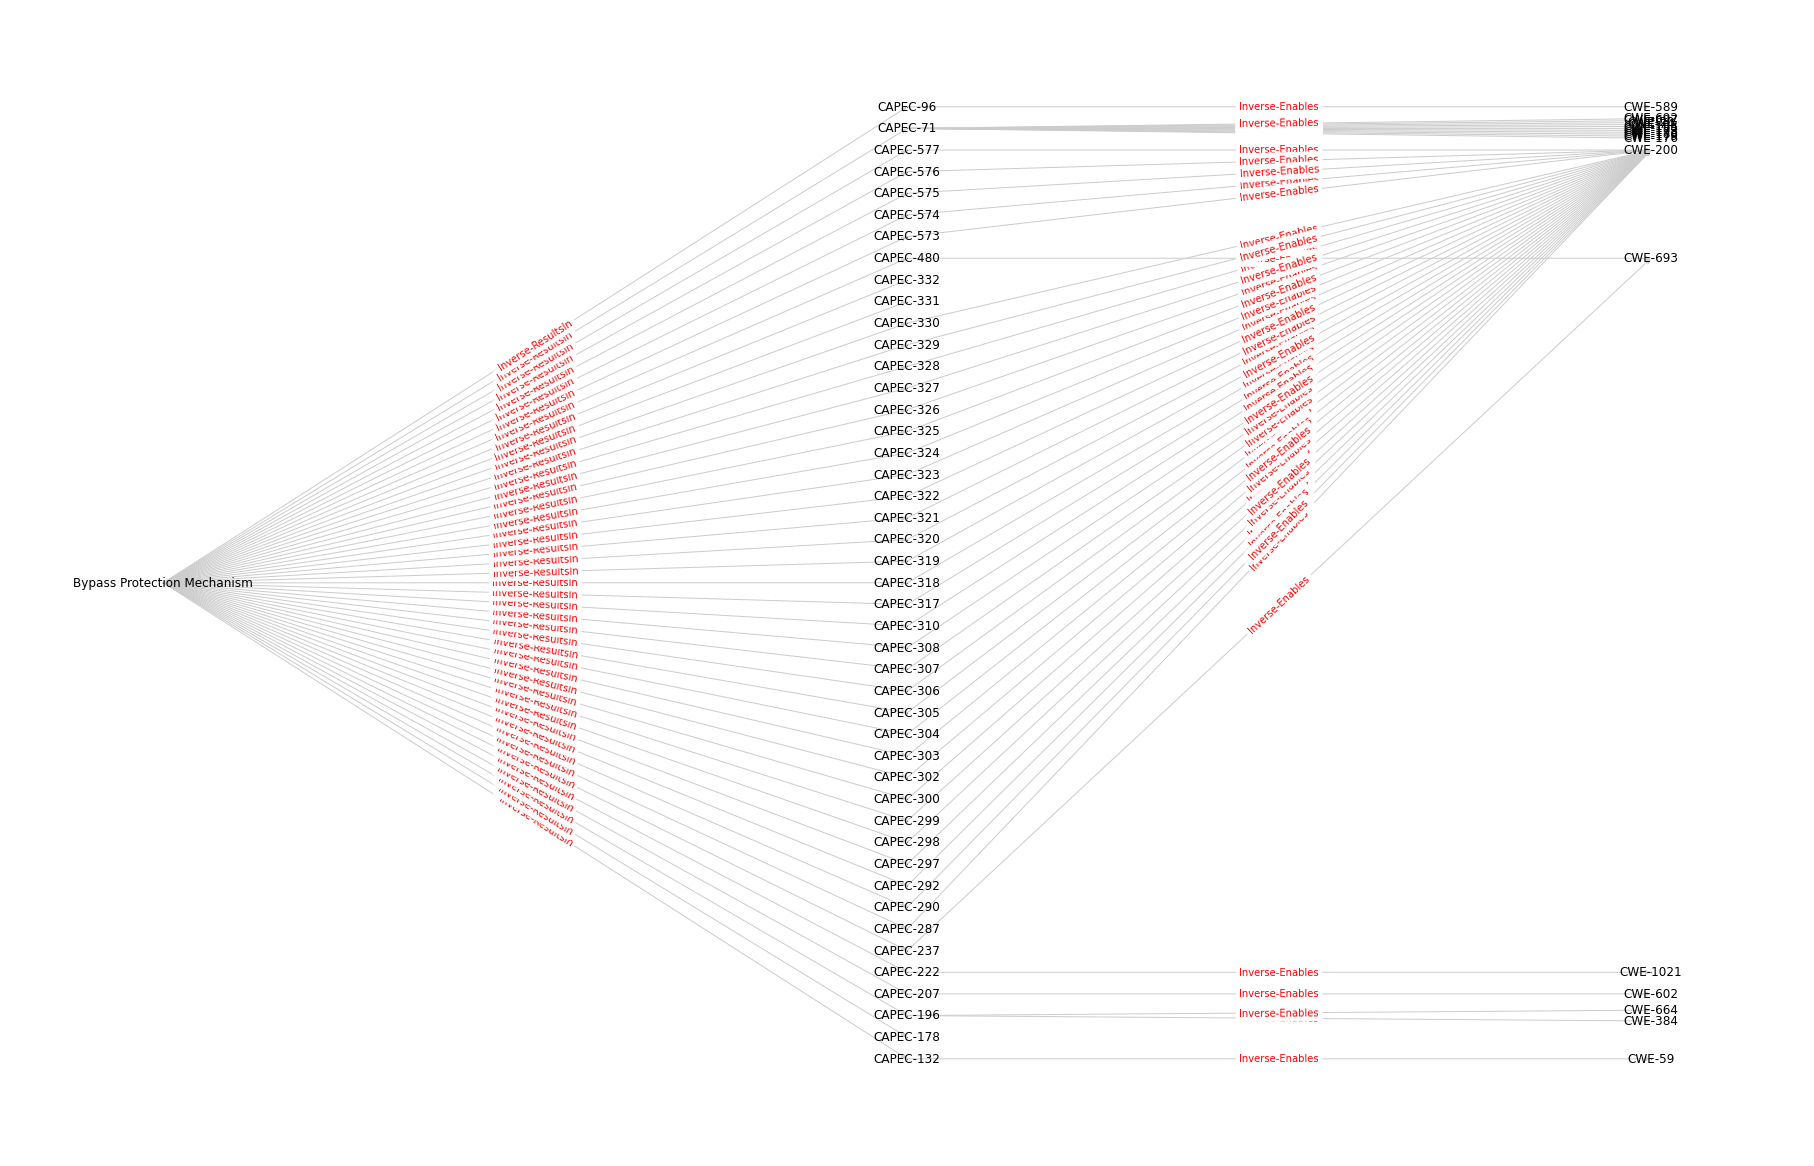

In [11]:
# The actual tree is very messy, this is a simplified, but still quite messy, version of the tree that was walked to get those requirements.

n = mt.filter_graph(graph, 
                 { 
                     'label': ['Bypass Protection Mechanism'], 
                     'group': ['Authorization'] 
                 }, 
                 { 'relationship': ['Inverse-ResultsIn',
                                    #'ResultsIn', 
                                    'Inverse-Enables', 
                                    #'Enables', 
                                    #'Inverse-Requires',
                                    #'Requires',
                                    #'Inverse-Prevents',
                                    #'Prevents',
                                    #'Inverse-Mitigates',
                                    #'Mitigates',
                                    #'ChildOf',
                                    #'ParentOf',
                                     ''
                                   ] },
                 { 'capec' : { 'likelihood_of_attack': 'High' } })
mt.show_tree(n)